In [12]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

data = pd.read_csv('stocks.csv')

print(data.head())

print(data.tail())

from scipy.stats import norm
log_returns = np.log(1 + data.close.pct_change())
u = log_returns.mean()
sd = log_returns.std()
var = log_returns.var()
drift = u - (0.5*var)

t_intervals = 100
iterations = 10 
daily_returns = np.exp(drift+sd*norm.ppf(np.random.rand(t_intervals, iterations)))

#set initial stock price to be equal to last closing price 

S0 = data.close.iloc[-1]

print(S0)

        date   open   high    low  close    volume Name
0   2/8/2013  15.07  15.12  14.63  14.75   8407500  AAL
1  2/11/2013  14.89  15.01  14.26  14.46   8882000  AAL
2  2/12/2013  14.45  14.51  14.10  14.27   8126000  AAL
3  2/13/2013  14.30  14.94  14.25  14.66  10259500  AAL
4  2/14/2013  14.94  14.96  13.16  13.99  31879900  AAL
            date   open   high    low  close   volume Name
619035  2/1/2018  76.84  78.27  76.69  77.82  2982259  ZTS
619036  2/2/2018  77.53  78.12  76.73  76.78  2595187  ZTS
619037  2/5/2018  76.64  76.92  73.18  73.83  2962031  ZTS
619038  2/6/2018  72.74  74.56  72.13  73.27  4924323  ZTS
619039  2/7/2018  72.70  75.00  72.69  73.86  4534912  ZTS
73.86


In [34]:

price_list = np.zeros((t_intervals, iterations))
price_list[0] = S0
#this will return an array of data with the same dimensions as our input
price_list 

#loop 
for x in range(1, t_intervals):
    for i in range(iterations):
        price_list[x, i] = price_list[x - 1, i] * daily_returns[x, i]
# Convert price_list to a DataFrame after the loop
price_list_df = pd.DataFrame(price_list, columns=[f'iteration_{i}' for i in range(iterations)])

# Convert 'data.close' to a DataFrame
close = pd.DataFrame(data.close)

# Concatenate 'close' and 'price_list_df' vertically
forecast = pd.concat([close, price_list_df], axis=1)

print(forecast.head())

print(forecast.tail())



   close  iteration_0  iteration_1  iteration_2  iteration_3  iteration_4  \
0  14.75    73.860000    73.860000    73.860000    73.860000    73.860000   
1  14.46    77.878505    74.478731    74.151208    75.469960    80.284606   
2  14.27    79.423788    74.401933    72.790192    74.160925    77.538344   
3  14.66    75.901244    76.581771    68.473087    78.505738    80.398715   
4  13.99    77.100227    74.083377    68.495829    74.885728    79.958892   

   iteration_5  iteration_6  iteration_7  iteration_8  iteration_9  
0    73.860000    73.860000    73.860000    73.860000    73.860000  
1    76.567834    75.745001    71.906435    71.700950    72.915625  
2    73.639480    74.485841    70.792319    76.504335    69.341732  
3    74.682550    77.477000    72.859050    77.542669    68.995919  
4    78.452856    79.099518    70.273641    77.096679    69.246262  


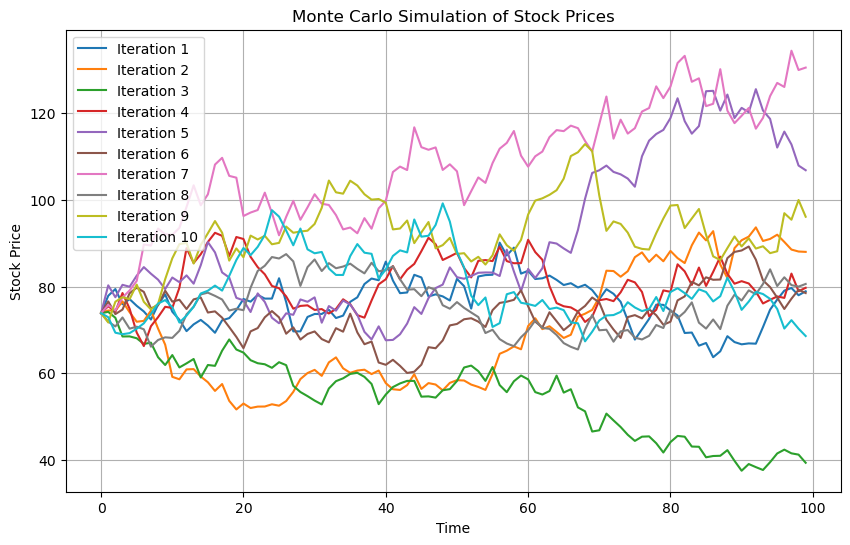

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for i in range(iterations): #it will perform the for loop "iterations" number of times 
    plt.plot(price_list[:, i], label=f'Iteration {i+1}') #making sure interations start from 1 instead of 0

plt.title('Monte Carlo Simulation of Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()
